# Task 28 
Identify relation between **education**, **number of kids**, and **marital status** to **rehospitalization** in each indication of 16-18


In [1]:
import pandas as pd
import os
import sys
import pandasql as ps
import plotly.express as px
sys.path.append('../')

In [2]:
os.getcwd()

'/home/michael/Projects/DSlab2/data-science2-lab-final-project/src/team_4'

## General data


In [3]:
# Load the provided Excel file
# The data is present in the data folder two directories up
data_dir = os.path.abspath(os.path.join(os.getcwd(),"..","data"))
dataset_path = os.path.join(data_dir,'GeneralData.csv')


In [4]:
# Load the 'GeneralData' sheet into a DataFrame for cleaning and completion
general_data = pd.read_csv(dataset_path)

# Display the first few rows to understand the structure and identify potential issues
general_data.head()

,Patient,age,Gender,Paying agent,Weight,Height,BMI,Chronic diseases,Number of children,Marital status,Regular medications,status,job,jobcat
0,1043772,84,Male,Clalit,92.0,170.0,31.8,1,3.0,married,"10815, 11282, 1183, 1196, 12758, 13027, 1333, ...",not working,NaN,Unknown
1,77493,89,Female,Self-financed,45.0,150.0,20.0,0,1.0,divorced,"10337, 1130, 1448, 1466, 186, 2482, 2907, 3261...",NaN,NaN,Unknown
2,37680,87,Male,Self-financed,67.7,165.0,24.9,0,2.0,married,"1183, 1310, 2451, 2566, 4967, 6718, 6720, 6737...",pension,NaN,Unknown
3,70066,90,Female,Meuhedet,94.0,165.0,34.5,0,1.0,divorced,"1100, 1181, 1182, 1183, 12757, 1283, 12946, 13...",NaN,NaN,Unknown
4,13616,87,Male,Clalit,70.0,163.0,26.3,0,3.0,married,"10214, 1212, 12725, 2882, 6737, 7852, 7999, 92...",NaN,NaN,Unknown


In [5]:
def summary(df):
    nonnans = df.shape[0] - df.isna().sum()
    nonnansPrc = (nonnans / df.shape[0] * 100).apply("{0:.2f}%".format)
    sam = df.sample(1, random_state=42).squeeze()
    res = pd.DataFrame([sam.index, df.dtypes.astype(str), nonnans,
                        nonnansPrc, df.nunique(), sam]).transpose()
    res.columns = ["Column", "data type", "non-null values", 
                   "non-null values %", "unique values", "example"]
    res.sort_values("unique values",ascending=False, inplace=True)
    return res

In [6]:
summary(general_data)

,Column,data type,non-null values,non-null values %,unique values,example
0,Patient,int64,4535,100.00%,4535,144443
10,Regular medications,object,4535,100.00%,4490,"1183, 2213, 5913"
12,job,object,780,17.20%,438,NaN
6,BMI,float64,4535,100.00%,293,28.3
4,Weight,float64,4535,100.00%,176,80.0
5,Height,float64,4535,100.00%,55,168.0
1,age,int64,4535,100.00%,42,98
13,jobcat,object,4535,100.00%,19,Unknown
8,Number of children,float64,4535,100.00%,16,2.0
3,Paying agent,object,4535,100.00%,7,Self-financed


In [7]:
general_data.loc[ general_data.status.isna(), "status" ] = "unk"

In [8]:
px.histogram(general_data, x= "age", facet_col="jobcat", facet_col_wrap = 5, height= 1000 , color = "status")

In [9]:
general_data

,Patient,age,Gender,Paying agent,Weight,Height,BMI,Chronic diseases,Number of children,Marital status,Regular medications,status,job,jobcat
0,1043772,84,Male,Clalit,92.0,170.0,31.8,1,3.0,married,"10815, 11282, 1183, 1196, 12758, 13027, 1333, ...",not working,NaN,Unknown
1,77493,89,Female,Self-financed,45.0,150.0,20.0,0,1.0,divorced,"10337, 1130, 1448, 1466, 186, 2482, 2907, 3261...",unk,NaN,Unknown
2,37680,87,Male,Self-financed,67.7,165.0,24.9,0,2.0,married,"1183, 1310, 2451, 2566, 4967, 6718, 6720, 6737...",pension,NaN,Unknown
3,70066,90,Female,Meuhedet,94.0,165.0,34.5,0,1.0,divorced,"1100, 1181, 1182, 1183, 12757, 1283, 12946, 13...",unk,NaN,Unknown
4,13616,87,Male,Clalit,70.0,163.0,26.3,0,3.0,married,"10214, 1212, 12725, 2882, 6737, 7852, 7999, 92...",unk,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,5473,82,Male,Self-financed,69.0,180.0,21.3,0,3.0,married,"1150, 1682, 2043, 2150, 2188, 2566, 2606, 2897...",pension,אלקטרונאי,Manufacturing
4531,980451,79,Male,Maccabi,64.0,170.0,22.1,0,4.0,married,6720,unk,NaN,Unknown
4532,430555,99,Male,Clalit,60.0,170.0,20.8,0,3.0,widowed,"12284, 2384, 2412, 2791, 2843, 3211, 3298, 347...",pension,NaN,Unknown
4533,737553,75,Male,Maccabi,97.0,170.0,33.6,0,3.0,married,"1183, 12730, 1637, 2568, 37, 3724, 4856, 6432,...",unk,תיווך,Real Estate


In [10]:
present = general_data[general_data.jobcat!="Unknown"]
fig = px.histogram(present, x="jobcat" ) # facet_col_wrap = 6, height= 1000 , color = "status")
#fig = px.box(gen_er, x = "jobcat", y = "days",facet_row="marital", height=800)
fig.update_xaxes(categoryorder="mean descending")
#fig

## er Before Hospitalization 2 data


In [11]:
dataset_path = os.path.join(data_dir, "erBeforeHospitalization2_cleaned.csv")
erBEfore = pd.read_csv(dataset_path)
erBEfore.head()

,Patient,Admission_Entry_Date,Release_Date,מחלקה מאשפזת1,ev_Admission_Date,ev_Release_Time,דרך הגעה למיון,מיון,urgencyLevelTime,אבחנות במיון,codeDoctor,Admission_Medical_Record2,Admission_Entry_Date2,Release_Date2,מחלקה מאשפזת2
0,1043772,2023-11-24 15:50:11.060,2023-11-26 15:00:00,3,2023-12-05 11:58:00,2023-12-05 21:08:00,נהג אמבולנס,מיון פנימי,3.0,7860,1296.0,7266393,2023-12-05 21:13:49.920,2023-12-08 11:46:00,3
1,1043772,2023-11-24 15:50:11.060,2023-11-26 15:00:00,3,2023-12-21 10:35:00,2023-12-21 15:21:00,דרך הגעה למיון_נהג אמבולנס,מיון פנימי,2.0,"2859 , 7860",2294.0,7309258,2023-12-21 15:21:57.077,2023-12-27 13:46:00,3
2,1043772,2023-12-05 21:13:49.920,2023-12-08 11:46:00,3,2023-12-21 10:35:00,2023-12-21 15:21:00,דרך הגעה למיון_נהג אמבולנס,מיון פנימי,2.0,"2859 , 7860",2294.0,7309258,2023-12-21 15:21:57.077,2023-12-27 13:46:00,3
3,77493,2021-09-07 18:28:03.267,2021-09-13 13:58:00,4,2021-09-19 18:10:00,2021-09-19 23:53:00,לבד,מיון פנימי,4.0,2765,10615.0,5238673,2021-09-20 00:21:42.443,2021-10-17 13:25:00,4
4,77493,2021-09-20 00:21:42.443,2021-10-17 13:25:00,4,2021-10-18 09:29:00,2021-10-18 11:01:00,לבד,מיון פנימי,4.0,7860,11443.0,5301377,2021-10-18 11:22:36.933,2021-10-21 10:00:00,4


First of all, I was not happy with the hebrew columns in the datraset, so we translated them

In [12]:
erBEfore.columns =['Patient', 'Admission_Entry_Date', 'Release_Date', 'Admission_Unit_1',
       'ev_Admission_Date', 'ev_Release_Time', 'ev_arrival', 'EV',
       'urgencyLevelTime', 'ev_Diagnoses', 'codeDoctor',
       'Admission_Medical_Record2', 'Admission_Entry_Date2', 'Release_Date2',
       'Admission_Unit_2']

### Pre-processing
Second issue, the amount of records in erBefore is much highher than patients in general data, and this required investigation.  



In [13]:
q ="""
select Patient,  count(Patient) as cnt 
from erBEfore
group by Patient
order by cnt desc
"""
counts = ps.sqldf(q)
counts.head(20)

,Patient,cnt
0,31075,162
1,749573,27
2,354573,26
3,196110,20
4,817206,19
5,2872,19
6,863707,18
7,119311,18
8,114049,18
9,27556,18


In [14]:
(counts.cnt >1).sum() 

1268

In [15]:
(counts.cnt ==1).sum()

2645

turns out, about 1/3 of patients had a lot of records.  
We examinine one such patient with particularly high number of records:


In [16]:
q ="""
select *, 'r' || cast(Admission_Medical_Record2 as TEXT) as record, 
'd' || cast(codeDoctor as TEXT) as doctor,
ev_arrival || '_' || urgencyLevelTime as howcame
from erBEfore
where Patient = 749573
"""
smol = ps.sqldf(q)
smol.head(5)

,Patient,Admission_Entry_Date,Release_Date,Admission_Unit_1,ev_Admission_Date,ev_Release_Time,ev_arrival,EV,urgencyLevelTime,ev_Diagnoses,codeDoctor,Admission_Medical_Record2,Admission_Entry_Date2,Release_Date2,Admission_Unit_2,record,doctor,howcame
0,749573,2022-08-01 22:52:50.827,2022-08-04 14:39:00,5,2022-08-08 16:32:00,2022-08-08 18:41:00,נהג אמבולנס,מיון פנימי,4.0,7895,10112.0,6088211,2022-08-08 20:05:26.163,2022-08-11 17:06:00,5,r6088211,d10112.0,נהג אמבולנס_4.0
1,749573,2022-08-01 22:52:50.827,2022-08-04 14:39:00,5,2022-08-29 13:29:00,2022-08-29 17:18:00,נהג אמבולנס,מיון פנימי,4.0,7895,6888.0,6132889,2022-08-29 18:01:25.217,2022-08-30 18:00:00,5,r6132889,d6888.0,נהג אמבולנס_4.0
2,749573,2022-08-08 20:05:26.163,2022-08-11 17:06:00,5,2022-09-09 11:48:00,2022-09-09 14:59:00,נהג אמבולנס,מיון פנימי,4.0,7895,10615.0,6157280,2022-09-09 15:43:25.897,2022-09-10 17:36:00,5,r6157280,d10615.0,נהג אמבולנס_4.0
3,749573,2022-08-08 20:05:26.163,2022-08-11 17:06:00,5,2022-08-29 13:29:00,2022-08-29 17:18:00,נהג אמבולנס,מיון פנימי,4.0,7895,6888.0,6132889,2022-08-29 18:01:25.217,2022-08-30 18:00:00,5,r6132889,d6888.0,נהג אמבולנס_4.0
4,749573,2022-08-29 18:01:25.217,2022-08-30 18:00:00,5,2022-09-26 18:14:00,2022-09-26 21:23:00,בן משפחה,מיון פנימי,4.0,7895,11430.0,6197410,2022-09-26 21:24:30.497,2022-09-27 16:13:00,5,r6197410,d11430.0,בן משפחה_4.0


In [17]:
summary(smol)

,Column,data type,non-null values,non-null values %,unique values,example
2,Release_Date,object,27,100.00%,10,2022-09-10 17:36:00
4,ev_Admission_Date,object,27,100.00%,10,2022-09-18 16:07:00
5,ev_Release_Time,object,27,100.00%,10,2022-09-18 18:15:00
15,record,object,27,100.00%,10,r6179728
1,Admission_Entry_Date,object,27,100.00%,10,2022-09-09 15:43:25.897
11,Admission_Medical_Record2,int64,27,100.00%,10,6179728
12,Admission_Entry_Date2,object,27,100.00%,10,2022-09-18 19:41:58.880
13,Release_Date2,object,27,100.00%,10,2022-09-19 17:57:00
16,doctor,object,27,100.00%,8,d11437.0
10,codeDoctor,float64,27,100.00%,8,11437.0


In [18]:
fig = px.timeline(smol, x_start="Admission_Entry_Date", x_end="Release_Date",
                  color ="record", y="doctor")
fig

from the figure above we can conclude:  
 - some patients have more than 2 hospitalizations in the span of time of the current study.
 - some patients were assigned more than one doctor during a single hospitalization
 - some patients were assigned more than one admission record during a single hospitalization
 - some patients wewre assigned more than one value for other parameters, such as urgency and way of arrival 

Due to this database de-normalization, a lot of duplicate records were created, which inflate the weights of individual admissions, corrupting the data.  
Fortunately, the time spans of events are exactly equal, so we can aggregate the database and acquire normalized data.


In [19]:
q ="""
select 
er.Patient, Admission_Entry_Date, Release_Date,
count(distinct Admission_Medical_Record2) as n_records, 
count(distinct codeDoctor) as n_doctors
from erBEfore er
where Patient = 749573
group by er.Patient, Admission_Entry_Date, Release_Date
"""
tst = ps.sqldf(q)
tst

,Patient,Admission_Entry_Date,Release_Date,n_records,n_doctors
0,749573,2022-08-01 22:52:50.827,2022-08-04 14:39:00,2,2
1,749573,2022-08-08 20:05:26.163,2022-08-11 17:06:00,2,2
2,749573,2022-08-29 18:01:25.217,2022-08-30 18:00:00,3,3
3,749573,2022-09-09 15:43:25.897,2022-09-10 17:36:00,3,3
4,749573,2022-09-18 19:41:58.880,2022-09-19 17:57:00,4,4
5,749573,2022-09-26 21:24:30.497,2022-09-27 16:13:00,4,3
6,749573,2022-10-02 20:11:37.720,2022-10-03 18:04:00,3,2
7,749573,2022-10-10 19:22:26.373,2022-10-11 14:00:00,3,2
8,749573,2022-10-18 19:33:16.030,2022-10-19 16:58:00,2,2
9,749573,2022-10-25 19:36:20.147,2022-10-26 15:50:00,1,1


In [20]:
fig = px.timeline(tst, x_start="Admission_Entry_Date", x_end="Release_Date",
                  color ="n_records", y="n_doctors")
fig

By doing so we get a single record per patient per hospitalization 

### days between admissions 
according to results of Task 16, the days between admissions should be split into 5 categories by quantiles
 - S  - short  
 - SM - short-medium  
 - M  - medium  
 - ML - medium-long  
 - L  - long  

In [21]:
# Function to convert a continuous variable into categories based on percentiles
def create_ordinals_by_precentile(data: pd.DataFrame, colname: str, groups_num: int):
    # Create percentile-based bins for the 'days_between_admissions' column
    range_col = 'range_' + colname
    ord_col = 'cat_' + colname
    data[range_col] = pd.qcut(data[colname], q=groups_num)
    bins_map = {value: idx for idx, value in enumerate(data[range_col].unique().sort_values())} 
    # Map the ranges to their corresponding category index
    data[ord_col] = data[range_col].map(bins_map) 
    del data[range_col]
    return data

In [22]:
erBEfore.Admission_Entry_Date2 = pd.to_datetime(erBEfore.Admission_Entry_Date2)
erBEfore.Release_Date = pd.to_datetime(erBEfore.Release_Date)
erBEfore['days_between_admissions'] = (erBEfore['Admission_Entry_Date2'] - erBEfore['Release_Date']).dt.days
erBEfore = create_ordinals_by_precentile(erBEfore, 'days_between_admissions', 5)

In [23]:
print(erBEfore.shape)
summary(erBEfore)

(7415, 17)


,Column,data type,non-null values,non-null values %,unique values,example
1,Admission_Entry_Date,object,7415,100.00%,6063,2021-02-21 11:09:00.467
11,Admission_Medical_Record2,int64,7415,100.00%,6035,4763622
12,Admission_Entry_Date2,datetime64[ns],7415,100.00%,6035,2021-03-03 22:20:08.273000
2,Release_Date,datetime64[ns],7415,100.00%,5983,2021-02-26 12:00:00
13,Release_Date2,object,7415,100.00%,5979,2021-03-04 14:00:00
4,ev_Admission_Date,object,7415,100.00%,5974,2021-03-03 16:26:00
5,ev_Release_Time,object,7415,100.00%,5964,2021-03-03 21:27:00
0,Patient,int64,7415,100.00%,3913,56875
9,ev_Diagnoses,object,7415,100.00%,1390,"2030 , 2761"
10,codeDoctor,float64,7415,100.00%,235,10948.0


Validate the new ordinal variable is consistent with the days between admissions

In [24]:
px.scatter(erBEfore, x = "days_between_admissions", y = "cat_days_between_admissions")

## Indication 16 (Team 5) 
Identify relation between **education**, **number of kids**, and **marital status** to **days_between_admissions** 

In [25]:
q ="""
select 
er.Patient, 
Admission_Entry_Date2, 
Release_Date, 
er.cat_days_between_admissions,
gd.jobcat as job,
gd.`Number of children` as children,	
gd.`Marital status` as marital, 
count(distinct codeDoctor) as doctors
from erBEfore er
left join general_data gd 
on er.Patient = gd.Patient
where gd.jobcat <> 'Unknown'
group by er.Patient, Admission_Entry_Date2, Release_Date
order by doctors desc
"""
gen_er = ps.sqldf(q)
print(gen_er.shape)
gen_er.head()

(1103, 8)


,Patient,Admission_Entry_Date2,Release_Date,cat_days_between_admissions,job,children,marital,doctors
0,85101,2022-03-21 18:50:39.170000,2022-03-05 19:18:00.000000,3,Household and Self-Employed,4.0,widowed,2
1,88665,2020-07-20 13:15:17.463000,2020-06-30 13:50:00.000000,3,Construction,8.0,married,2
2,88665,2020-07-20 13:15:17.463000,2020-07-10 14:39:00.000000,2,Construction,8.0,married,2
3,93463,2020-01-07 09:03:27.533000,2020-01-02 13:58:00.000000,0,Human Health and Social Work,0.0,divorced,2
4,183644,2021-06-08 19:50:29.333000,2021-05-23 15:36:00.000000,3,Professional Scientific and Technical,2.0,married,2


In [26]:
summary(gen_er)

,Column,data type,non-null values,non-null values %,unique values,example
1,Admission_Entry_Date2,object,1103,100.00%,953,2020-12-05 06:02:13.003000
2,Release_Date,object,1103,100.00%,951,2020-11-26 16:55:00.000000
0,Patient,int64,1103,100.00%,634,88665
4,job,object,1103,100.00%,18,Construction
5,children,float64,1103,100.00%,14,8.0
3,cat_days_between_admissions,object,1103,100.00%,5,1
6,marital,object,1103,100.00%,5,married
7,doctors,int64,1103,100.00%,2,1


### Modeling
We will use approach and code of team 7 for this with slight modifiactions

In [27]:
from team_7.task29.task_29_model import *

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

def encode_variables(df_copy, numeric_columns, categorical_columns, label_columns):
    # Initialize the transformers
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(sparse_output=False)  # One-hot encoding
    label_transformer = OrdinalEncoder()
    
    # Create a column transformer to process numeric and categorical data
    preprocessor = ColumnTransformer(sparse_threshold=0,
        transformers=[
            ('num', numeric_transformer, numeric_columns),
            ('cat', categorical_transformer, categorical_columns),
            ('lab', label_transformer,label_columns)
        ]
    )
    # Fit and transform the data (without doctor column)
    X_processed = preprocessor.fit_transform(df_copy)
    variables =  preprocessor.get_feature_names_out()
    # Return the number of features after preprocessing
    X_processed = pd.DataFrame(X_processed, columns=variables)
    return X_processed


In [29]:
models_params = define_models_params()

# models_params.pop('Neural Network') # 

df_fixed = gen_er.copy(deep=True)

categorical =  ['marital', 'job',]

numeric = ['children', ]

label = [ 'cat_days_between_admissions',]

features = categorical + numeric

target = 'cat_days_between_admissions'

classes = ['S','SM','M','ML','L']

df_fixed = encode_variables(df_fixed, numeric, categorical, label)

print(df_fixed.shape)

feat, targ = df_fixed.columns[:-1], df_fixed.columns[-1]


(1103, 25)


In [30]:
print("features:")
print("\n".join(feat))
print("\ntarget:")
print(targ)

features:
num__children
cat__marital_divorced
cat__marital_married
cat__marital_separated
cat__marital_single
cat__marital_widowed
cat__job_Accommodation and Food
cat__job_Administrative and Support
cat__job_Agriculture Forestry and Fishing
cat__job_Arts Entertainment and Recreation
cat__job_Construction
cat__job_Education
cat__job_Electricity Gas Steam and Air Conditioning Supply
cat__job_Financial and Insurance
cat__job_Household and Self-Employed
cat__job_Human Health and Social Work
cat__job_Information and Communication
cat__job_Manufacturing
cat__job_Other
cat__job_Professional Scientific and Technical
cat__job_Public Administration and Defence
cat__job_Real Estate
cat__job_Transportation and Storage
cat__job_Wholesale and Retail Trade; Repair Services

target:
lab__cat_days_between_admissions


We will perform grid search on several classic machine learning algorithms and choose the one that gives best accuracy.  
Below are the models and grid parameters wee are going to try:  

In [31]:
models_params

{'Logistic Regression': (LogisticRegression(max_iter=1000),
  {'C': [0.01, 0.1, 1, 10, 100]}),
 'Decision Tree': (DecisionTreeClassifier(),
  {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}),
 'Random Forest': (RandomForestClassifier(),
  {'n_estimators': [50, 100, 200],
   'max_depth': [5, 10, 20],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   'bootstrap': [True, False]}),
 'Gradient Boosting': (GradientBoostingClassifier(),
  {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]}),
 'Support Vector Machine': (SVC(),
  {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
 'XGBoost': (XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
            

In [32]:
# Run comparison for Duration_Category_16
results_16, best_model_16, X_test_16, y_test_16, y_pred_16, best_model_name_16 = compare_models(df_fixed, feat, targ, models_params)


/media/michael/Data/anaconda3/envs/Intelligent/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/michael/Data/anaconda3/envs/Intelligent/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/michael/Data/anaconda3/envs/Intelligent/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/michael/Data/anaconda3/envs/Intelligent/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reac

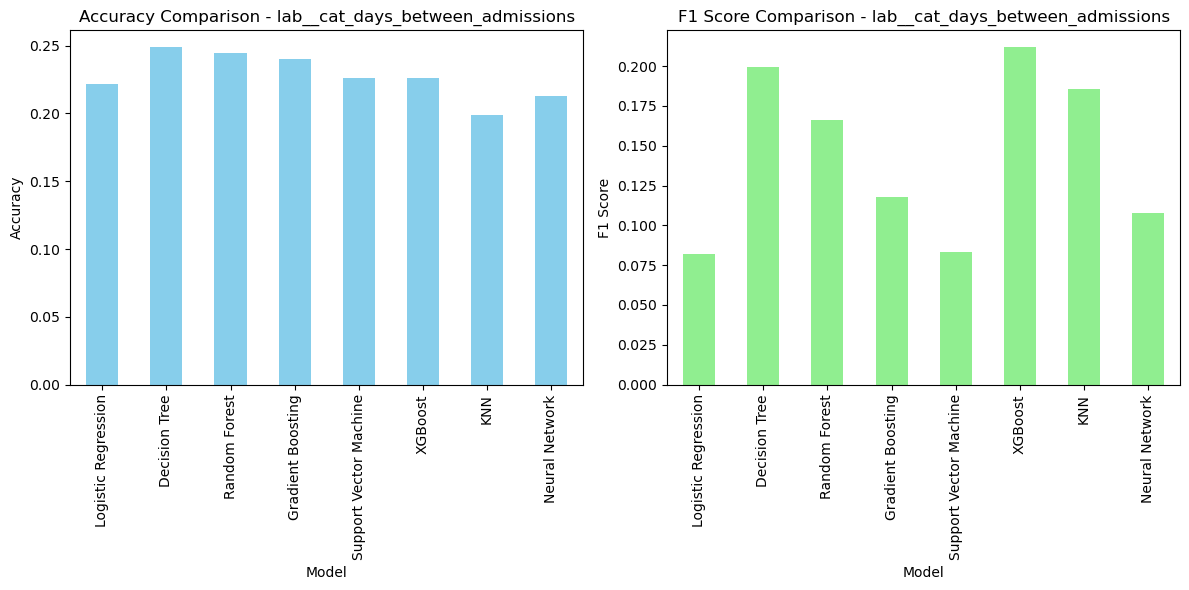

In [33]:
visualize_results(results_16[['Model', 'Accuracy', 'F1 Score']], targ)

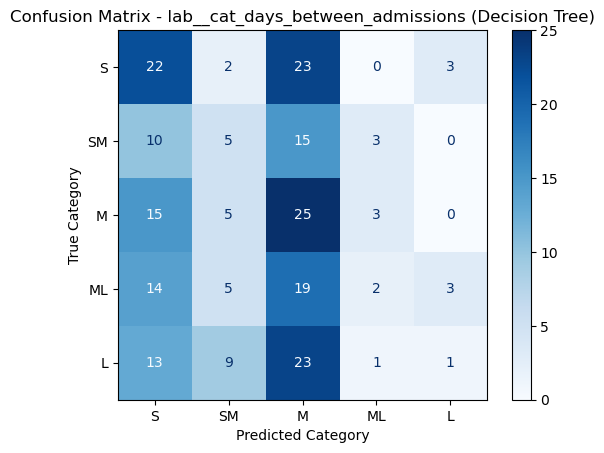

In [34]:
plot_confusion_matrix(best_model_name_16, X_test_16, y_test_16, y_pred_16, targ, classes)

After several attempts we acquire very poor classification results, indicating that here seems to be no significant relation between occupation, number of kids and marital status to days between hospitalizations.

## Indication 17 (Team 10) 
Identify relation between **education**, **number of kids**, and **marital status** to **days_in_hospitalization_1** 
## Indication 18 (Team 6) 
Identify relation between **education**, **number of kids**, and **marital status** to **days_in_hospitalization_2**

In [35]:
df_fixed, classes_17 = encode_target(df_fixed, 'Duration_Category_17')
df_fixed, classes_18 = encode_target(df_fixed, 'Duration_Category_18')

# Run comparison for Duration_Category_17
results_17, best_model_17, X_test_17, y_test_17, y_pred_17, best_model_name_17 = compare_models(df_fixed, medication_columns, 'Duration_Category_17', models_params)
visualize_results(results_17[['Model', 'Accuracy', 'F1 Score']], 'Duration_Category_17')
display_html_table(results_17)
plot_confusion_matrix(best_model_name_17, X_test_17, y_test_17, y_pred_17, 'Duration_Category_17', classes_17)

# Run comparison for Duration_Category_18
results_18, best_model_18, X_test_18, y_test_18, y_pred_18, best_model_name_18 = compare_models(df_fixed, medication_columns, 'Duration_Category_18', models_params)
visualize_results(results_18[['Model', 'Accuracy', 'F1 Score']], 'Duration_Category_18')
display_html_table(results_18)
plot_confusion_matrix(best_model_name_18, X_test_18, y_test_18, y_pred_18, 'Duration_Category_18', classes_18)


KeyError: 'Duration_Category_17'